<h1> Advanced Learning for Text and Graph Data </h1>
<b> Université Paris-Saclay - Master M2 Data Science - February/March 2017</b> <br>
<i> Students : Peter Martigny & Mehdi Miah </i> <br>

# Second part  : analyze the data

## Open the data

In [1]:
#import
import numpy as np
import pandas as pd
from handy_structures import * #own functions
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#path to data and results
path_to_data = "../data/"
path_to_results = "../results/"

#open files
#original data
training_set = pd.read_csv(path_to_data + 'training_set.csv')
training_info = pd.read_csv(path_to_data + 'training_info.csv', 
                            dtype = {'mid': object, 'date': object, 'body': object, 'recipients' : object})
test_set = pd.read_csv(path_to_data + 'test_set.csv')
test_info = pd.read_csv(path_to_data + 'test_info.csv',
                        dtype = {'mid': object, 'date': object, 'body': object})

#dataframe with all data
training_df = pd.read_csv(path_to_results + 'training_df.csv',
                          dtype = {'mid': object, 'sender': object, 'date': object, 'body': object,
                                  'body_rt': object, 'body_rf': object, 'clean_body': object, 'recipients' : object})
test_df = pd.read_csv(path_to_results + 'test_df.csv',
                          dtype = {'mid': object, 'sender': object, 'date': object, 'body': object, 
                                  'body_rt': object, 'body_rf': object, 'clean_body': object})

C:\Users\Mehdi\Annexes\PythonENSAE_v2\python\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Dimensions of the problems

### Number of emails

In [2]:
# Training set
n_mails_training = training_df.shape[0]
print('There are', n_mails_training, 'different emails in the training dataset.')

# Test set
n_mails_test = test_df.shape[0]
print('There are', n_mails_test, 'different emails in the test dataset.')

There are 43613 different emails in the training dataset.
There are 2362 different emails in the test dataset.


### Number of unique senders

In [3]:
# Training set
n_senders_training = len(training_df['sender'].unique())
print('There are', n_senders_training, 'different senders in the training dataset.')

# Test set
n_senders_test = len(test_df['sender'].unique())
print('There are', n_senders_test, 'different senders in the test dataset.')

There are 125 different senders in the training dataset.
There are 125 different senders in the test dataset.


Fortunately, every sender in the test dataset is in the train dataset.

### Number of unique recipients

In [4]:
#Training set
list_recipients = []

for row in range(training_df.shape[0]):
    list_recipients.extend(training_df['recipients'][row].split(' '))
    
n_recipients_training = len(np.unique(list_recipients))
print('There are', n_recipients_training, 'different recipients in the training dataset.')

#Test set
# we have to find them =)

There are 9871 different recipients in the training dataset.


We can notice than there are 80 times more recipients than senders ! 

## Distribution of number of mails sent by individual

In [5]:
address_books = get_address_books(training_info, training_set)

In [6]:
n_emails_per_sender_training = {} #create a new dictionnary
for index, series in training_set.iterrows(): #series contains senders and mids
    #for each instance:
    row = series.tolist() #we get a list of with the sender at position 0 and each of ones mails
    sender = row[0] #this is the sender
    ids = row[1:][0].split(' ') #we get a list with all the mids
    n_emails_per_sender_training[sender] = len(ids) #we add them in the dictionnary
    
#We sort it in order to make the plot easier later    
n_emails_per_sender_training = sorted(n_emails_per_sender_training.values())

In [7]:
# Sanity test
np.sum(n_emails_per_sender_training) == training_info.shape[0]

True

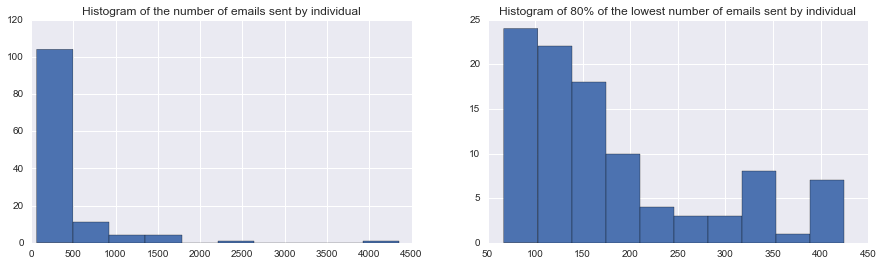

In [8]:
plt.figure(figsize=(15.0, 4.0))

plt.subplot(1, 2, 1)
plt.hist(n_emails_per_sender_training)
plt.title('Histogram of the number of emails sent by individual')

plt.subplot(1, 2, 2)
plt.hist(n_emails_per_sender_training[:round(0.8*n_senders_training)])
plt.title('Histogram of 80% of the lowest number of emails sent by individual')


In [9]:
#Some statistics on that distribution

mean_n_emails_per_sender_training = np.mean(n_emails_per_sender_training)
print('The mean of this distribution is', mean_n_emails_per_sender_training)

median_n_emails_per_sender_training = np.median(n_emails_per_sender_training)
print('The median of this distribution is', median_n_emails_per_sender_training)


The mean of this distribution is 348.904
The median of this distribution is 168.0


So, this a positive skewed distribution.

## How many times do they send an email to someone ?

In [10]:
#Count the number of mails sent to an employe
n_mails_sent_to_someone=[]
for sender, value in address_books.items(): #for each sender
    for rec in value: #for each recipient
        res = rec[1] #the number of email sent by 'sender' to 'rec'
        n_mails_sent_to_someone.append(res)  
        
# We sort the result in order to make the analysis easier        
n_mails_sent_to_someone = sorted(n_mails_sent_to_someone)

In [11]:
#Number of unique links sender-recipient
len(n_mails_sent_to_someone)

23134

In [12]:
# Count the percentage of links sender-recipient with one mail related to them.
# A '1' means that it exist a couple (sender, recipient) such that the sender sent only one mail to the recipient.
n_links_with_one_mail = n_mails_sent_to_someone.count(1)/len(n_mails_sent_to_someone)
print('%.1f%% of the links are made with only one mail.' % round(n_links_with_one_mail * 100, 1))

33.6% of the links are made with only one mail.


This simple statics is rude : one third of the connection is unique. Consequently, if we based the prediction on the previous recipient for a user, we will miss, at least one case over three, a recipient.

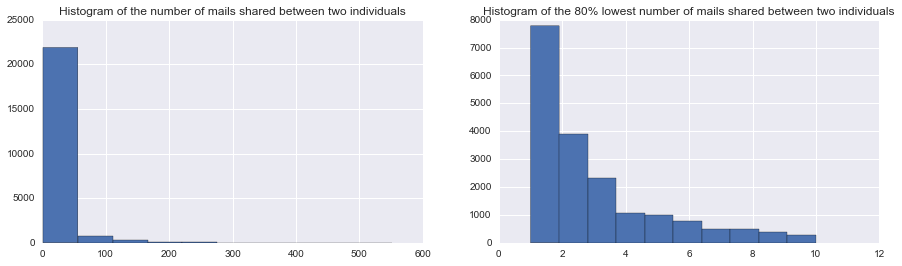

In [13]:
plt.figure(figsize=(15.0, 4.0))

plt.subplot(1, 2, 1)
plt.hist(n_mails_sent_to_someone)
plt.title('Histogram of the number of mails shared between two individuals')

plt.subplot(1, 2, 2)
limit = round(0.8*len(n_mails_sent_to_someone))
plt.hist(n_mails_sent_to_someone[:limit])
plt.title('Histogram of the 80% lowest number of mails shared between two individuals')

## Length of mails

### Original texts

In [14]:
length_mail_training = training_df['body'].apply(len)
length_mail_test = test_df['body'].apply(len)

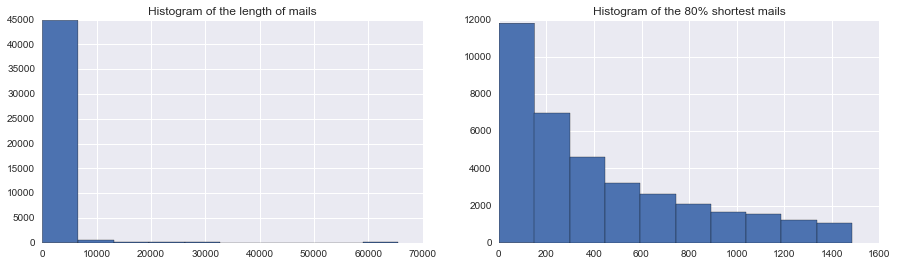

In [32]:
#All the lengths of mails
length_mails = list(length_mail_training) + list(length_mail_test)
length_mails = sorted(length_mails)

plt.figure(figsize=(15.0, 4.0))

plt.subplot(1, 2, 1)
plt.hist(length_mails)
plt.title('Histogram of the length of mails')

plt.subplot(1, 2, 2)
limit = int(0.8*len(length_mails))
plt.hist(length_mails[:limit])
plt.title('Histogram of the 80% shortest mails')

In [33]:
print('The shortest mail contains %.0f character.' %min(length_mails))

The shortest mail contains 1 character.


### Cleaned texts

In [39]:
#One has to remove the mails with 0 character (after cleaning, stopwords have been deleted, so some mails may be empty)
training_df = training_df.dropna()
test_df = test_df.dropna()

In [40]:
length_clean_mail_training = training_df['clean_body'].apply(len)
length_clean_mail_test = test_df['clean_body'].apply(len)

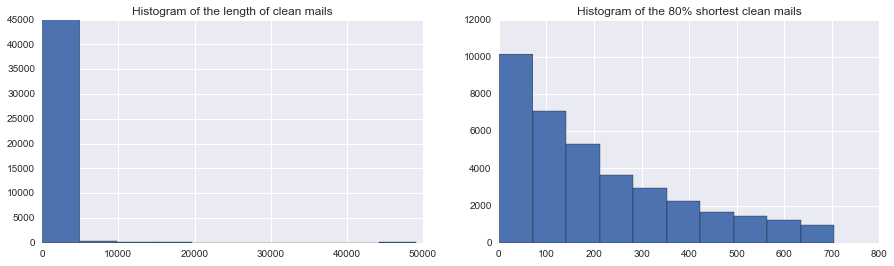

In [41]:
#All the lengths of mails
length_clean_mails = list(length_clean_mail_training) + list(length_clean_mail_test)
length_clean_mails = sorted(length_clean_mails)

plt.figure(figsize=(15.0, 4.0))

plt.subplot(1, 2, 1)
plt.hist(length_clean_mails)
plt.title('Histogram of the length of clean mails')

plt.subplot(1, 2, 2)
limit = int(0.8*len(length_clean_mails))
plt.hist(length_clean_mails[:limit])
plt.title('Histogram of the 80% shortest clean mails')

In [44]:
print('Before cleaning, a mail contains on average %.0f characters.' %np.mean(length_mails))
print('After cleaning, a mail contains on average %.0f characters.' %np.mean(length_clean_mails))

Before cleaning, a mail contains in mean 1288 characters.
After cleaning, a mail contains in mean 743 characters.
